# Generate Polymer Statistics

Load polymer configurations from simulation output directory and calculate basic polymer statistics from configurations.

## Import directories

In [1]:
import importlib
import os
import sys
from io import StringIO

import numpy as np
import pandas as pd

cwd = os.getcwd()
sys.path[8] = sys.path[0]
os.chdir("../..")
print("Current Working Directory: ")
print(os.getcwd())
sys.path.append(os.getcwd())


Current Working Directory: 
/Users/jwakim/Documents/Wakim_Research/Scripts/testing_chromo_16-Mar-2021


## Load local modules

In [2]:
import chromo.util.poly_stat as ps

## List configuration files

In [3]:
# Specify the simulation ID on which to run the analysis
sim_ID = 17

# Open the output directory
os.chdir(cwd + "/../../")
output_dir = os.getcwd() + "/output/sim_" + str(sim_ID)

# Generate a list of CSV configuration files in the output directory
output_files = os.listdir(output_dir)
output_files = [f for f in output_files if f.endswith(".csv")]

# Sort the CSV configuration files by snapshot number
snapshot = [int(f.split("-")[-1].split(".")[0]) for f in output_files]
output_files = [f for _, f in sorted(zip(snapshot, output_files))]

## Calculate end-to-end distances

In [4]:
os.chdir(cwd + "/../../chromo/util")

r2 = []
for i, f in enumerate(output_files):
    if (i+1) % 10 == 0:
        print("Snapshot: " + str(i+1) + " of " + str(len(output_files)))
        print("File: " + f)
        print()
    
    poly_stat = ps.PolyStat("output/sim_" + str(sim_ID) + "/" + f)
    r2.append(
        poly_stat.get_avg_r2(sampling_scheme="overlap_slide", bead_separation=10)
    )

Snapshot: 10 of 150
File: Chr-1-9.csv

Snapshot: 20 of 150
File: Chr-1-19.csv

Snapshot: 30 of 150
File: Chr-1-29.csv

Snapshot: 40 of 150
File: Chr-1-39.csv

Snapshot: 50 of 150
File: Chr-1-49.csv

Snapshot: 60 of 150
File: Chr-1-59.csv

Snapshot: 70 of 150
File: Chr-1-69.csv

Snapshot: 80 of 150
File: Chr-1-79.csv

Snapshot: 90 of 150
File: Chr-1-89.csv

Snapshot: 100 of 150
File: Chr-1-99.csv

Snapshot: 110 of 150
File: Chr-1-109.csv

Snapshot: 120 of 150
File: Chr-1-119.csv

Snapshot: 130 of 150
File: Chr-1-129.csv

Snapshot: 140 of 150
File: Chr-1-139.csv

Snapshot: 150 of 150
File: Chr-1-149.csv



## Visualize polymer statistics

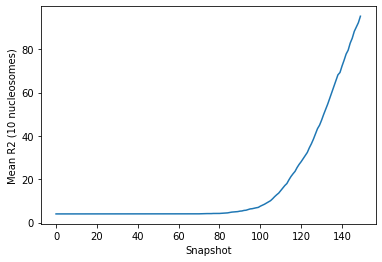

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.plot(r2)
plt.xlabel("Snapshot")
plt.ylabel("Mean R2 (10 nucleosomes)")
plt.show()

## Visualize Polymer Configuration

Why do later snapshots of polymer configuration show such large mean squared R2?

In [60]:
# Specify path to the final snapshot
final_snapshot = output_files[0]
os.chdir(cwd)
os.chdir("../../output/sim_" + str(sim_ID))

# Load the final snapshot
final_snapshot_data = pd.read_csv(final_snapshot, skiprows=1, index_col=0, usecols=[0,1,2,3])
final_snapshot_data.head()


,x,y,z
0,2.471634e-13,0.0,0.0
1,2.000000e-01,0.0,0.0
2,4.000000e-01,0.0,0.0
3,6.000000e-01,0.0,0.0
4,8.000000e-01,0.0,0.0


In [61]:
x = final_snapshot_data.x.values
y = final_snapshot_data.y.values
z = final_snapshot_data.z.values

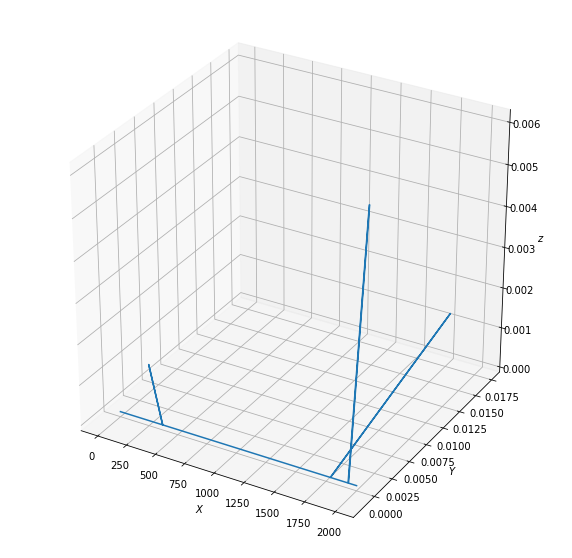

In [65]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
ax.set_xlabel('x', fontsize=30)
ax.set_ylabel('y', fontsize=30)
ax.set_zlabel('z', fontsize=30)
plt.show()